In [1]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras

Using TensorFlow backend.


# Problem 1

In [2]:
wdbc_data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",
delim_whitespace=True, header=None))

In [26]:
X = wdbc_data[:,0:30] # features
Y = wdbc_data[:,30] # my labels

In [5]:
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0]

In [6]:
# Mean center a vector
def mean_center(x):
    return x - np.mean(x)
# Call this function for each column in the data ( move along axis 0 or the rows )
Xcentered = np.apply_along_axis(mean_center,0,X)

### 1.a

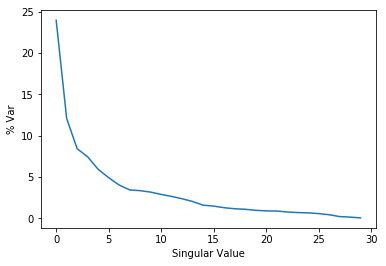

In [7]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

### 1.b

In [9]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

### 1.c

In [11]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]]) 
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

# Extract just the first two principal components!
PCs = Xrotated[:,0:2] 
PCs.shape

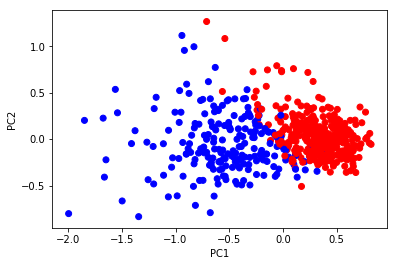

In [15]:
# The x and y values come from the two
# Principal Components
plt.scatter(PCs[:,0],PCs[:,1],
            color=[['red','blue'][i] for i in Y.astype(int)]) 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 1.d

### We can almost say there is a clear category distinction. It is almost possible to draw a line between them.
### However, there are is still some data points that are mixed in making this a difficult classification.

# Problem 2

In [16]:
cancer_data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/cancer-data.txt",
delim_whitespace=True, header=None))

In [17]:
print(cancer_data.shape)

(105, 10)


In [32]:
X = cancer_data[:,0:9] # features
Y = cancer_data[:,9] # my labels

In [33]:
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0  2.0  3.0  4.0  5.0]

In [34]:
Xcentered = np.apply_along_axis(mean_center,0,X)

### 2.a

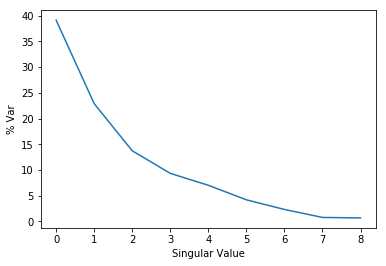

In [35]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

### 2.b

In [37]:
# Variance accounted for in the first two principal components
100.0*(S[0]+S[1])/np.sum(S)

### 2.c

In [38]:
# Scale the singular vectors, resulting in a rotated form of our mean-centered data
D = np.zeros([X.shape[0],X.shape[1]]) 
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

# Extract just the first two principal components!
PCs = Xrotated[:,0:2] 
PCs.shape

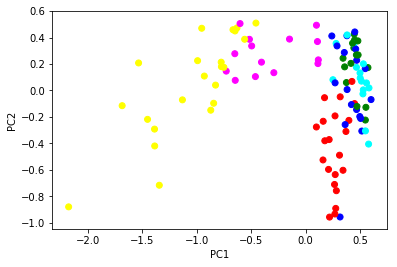

In [42]:
# The x and y values come from the two
# Principal Components
plt.scatter(PCs[:,0],PCs[:,1],
            color=[['red','green','blue','cyan','magenta','yellow'][i] for i in Y.astype(int)]) 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 2.d

### There are some divisions between some of the classes, but some are not so clear. 
### For instance, the cyan, blue, and green data points have no division, but the rest do.